In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Sun Aug 31 11:33:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

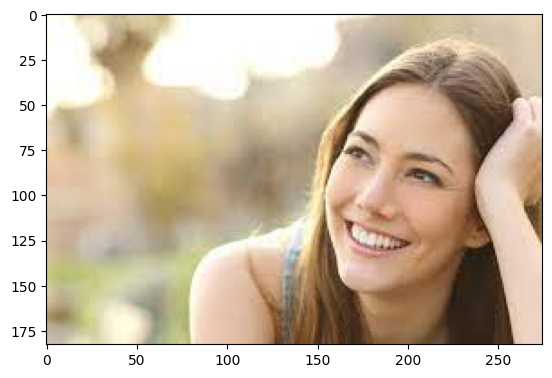

In [7]:
img = image.load_img(r'/content/drive/MyDrive/CNN/1_Training/Happy/Happy_02.jpeg')
plt.imshow(img)

array([[[253, 254, 244],
        [253, 254, 244],
        [251, 253, 247],
        ...,
        [211, 218, 227],
        [212, 219, 228],
        [212, 219, 228]],

       [[253, 254, 244],
        [251, 254, 245],
        [251, 253, 247],
        ...,
        [210, 217, 226],
        [211, 218, 227],
        [212, 219, 228]],

       [[251, 254, 245],
        [249, 254, 245],
        [249, 253, 247],
        ...,
        [209, 216, 225],
        [209, 216, 225],
        [210, 217, 226]],

       ...,

       [[  0,  16,  28],
        [  0,  16,  28],
        [  1,  17,  29],
        ...,
        [  1,  21,  32],
        [  1,  21,  32],
        [  0,  21,  32]],

       [[  0,  15,  27],
        [  0,  16,  28],
        [  0,  16,  28],
        ...,
        [  0,  20,  31],
        [  0,  20,  31],
        [  0,  20,  31]],

       [[  0,  15,  27],
        [  0,  15,  27],
        [  0,  16,  28],
        ...,
        [  2,  20,  31],
        [  0,  20,  31],
        [  0,  20,  31]]], dtype=uint8)
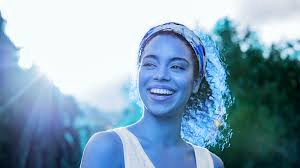

In [8]:
i1 = cv2.imread(r'/content/drive/MyDrive/CNN/1_Training/Happy/Happy_01.jpeg')
i1

In [9]:
i1.shape

(168, 300, 3)

In [11]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [12]:
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/CNN/1_Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'/content/drive/MyDrive/CNN/3_Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 27 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [13]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [14]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [15]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [21]:
model_fit = model.fit(train_dataset,epochs=10)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 663ms/step - accuracy: 0.4654 - loss: 0.7403
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6924 - loss: 0.6658
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6774 - loss: 0.6543
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7272 - loss: 0.6277
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5974 - loss: 0.5940
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8784 - loss: 0.3832
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9884 - loss: 0.2386
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9599 - loss: 0.1241
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9781 - loss: 0.0581
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0205


In [22]:
dir_path = r'/content/drive/MyDrive/CNN/2_Testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

Happy_01.jpeg
Happy_04.jpeg
Happy_06.jpeg
Happy_07.jpeg
Happy_15.jpeg
Happy_17.jpeg
Sad_01.jpg
Sad_06.jpg
Sad_09.jpg


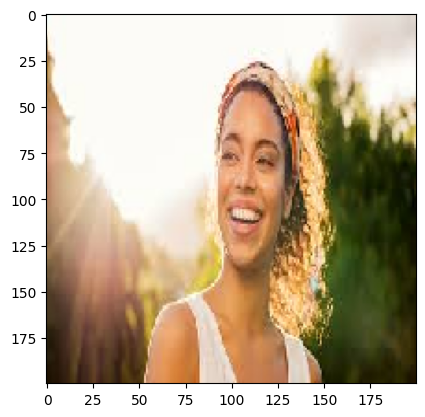

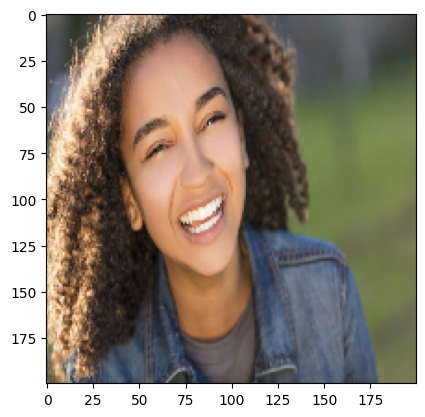

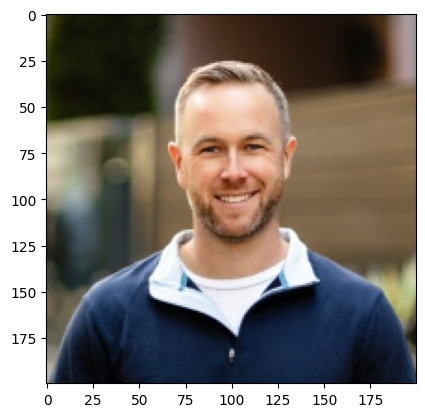

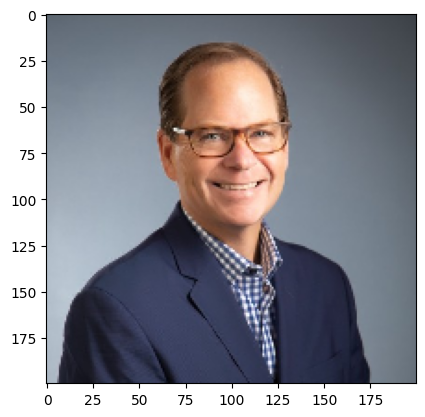

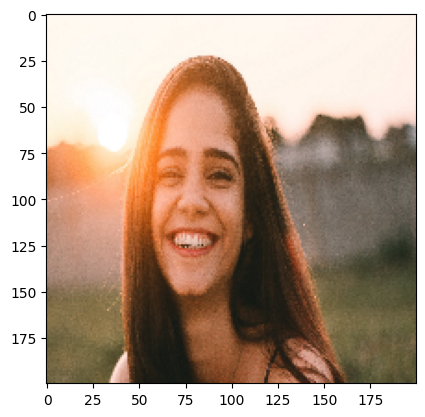

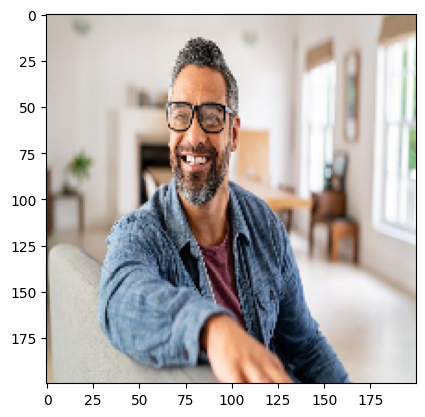

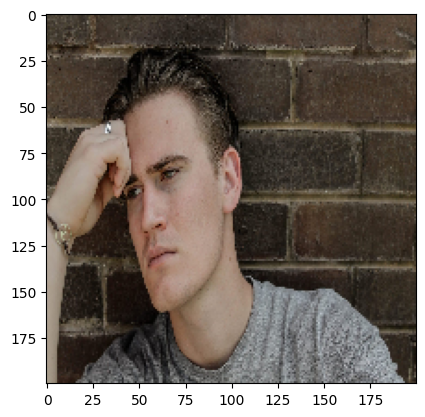

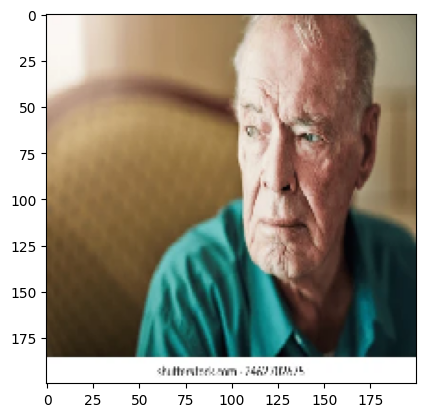

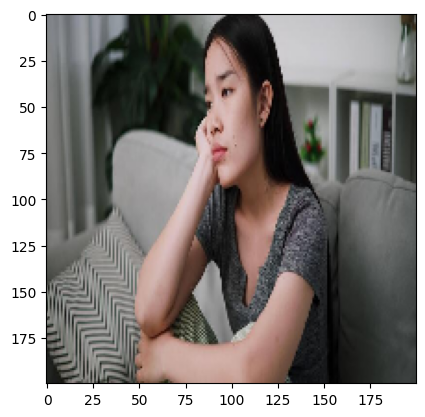

In [23]:
dir_path = r'/content/drive/MyDrive/CNN/2_Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

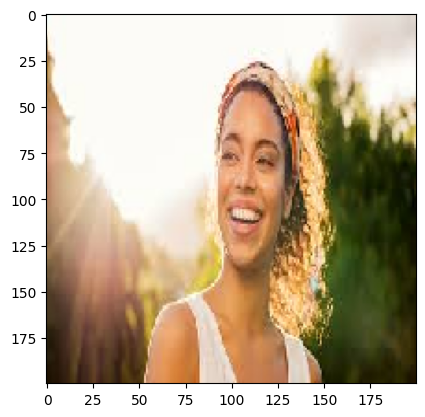

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 i am happy


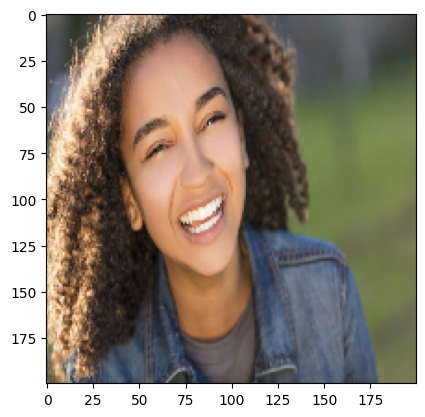

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
 i am happy


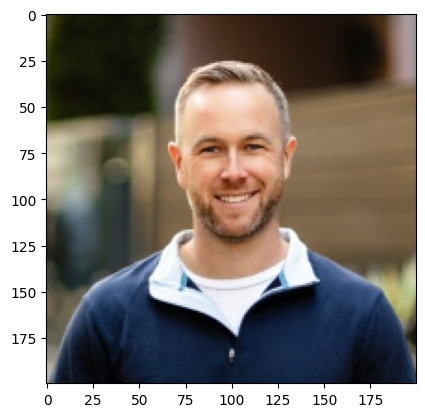

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
 i am happy


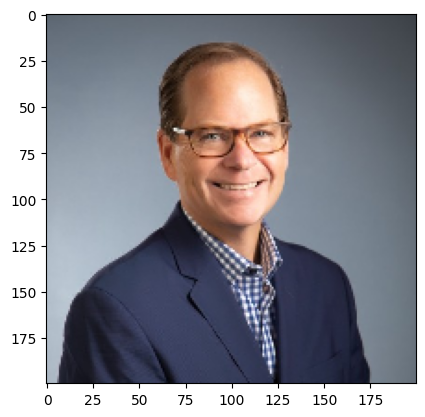

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
 i am happy


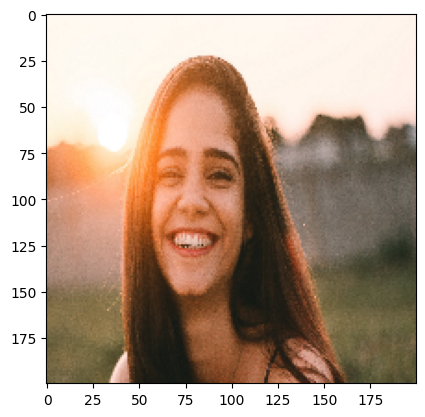

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
 i am happy


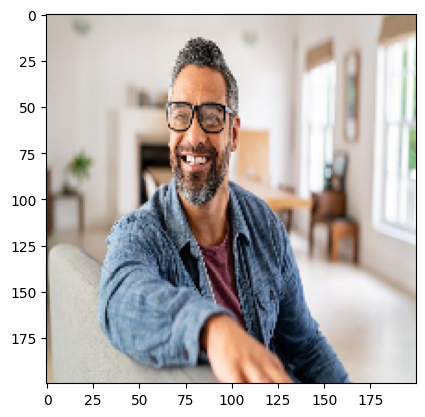

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 i am happy


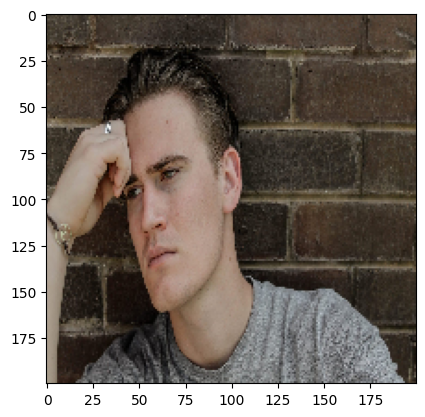

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


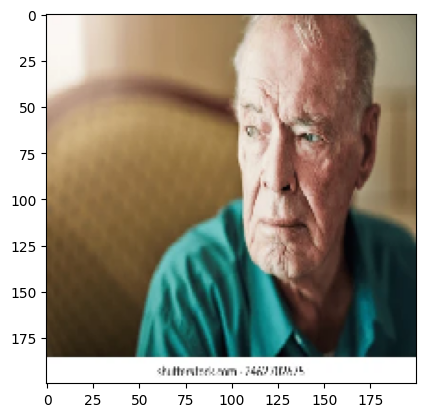

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
i am not happy


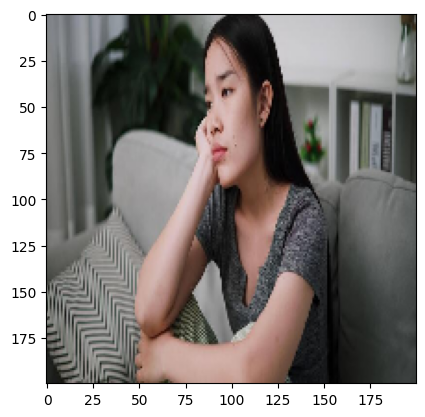

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


In [25]:
dir_path = r'/content/drive/MyDrive/CNN/2_Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')